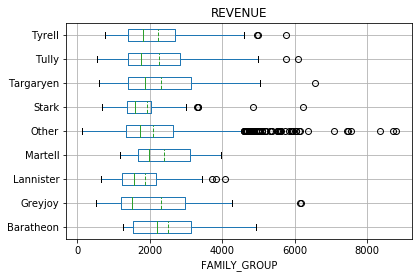

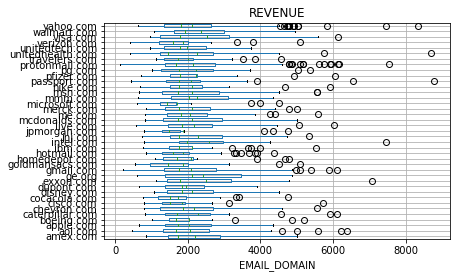

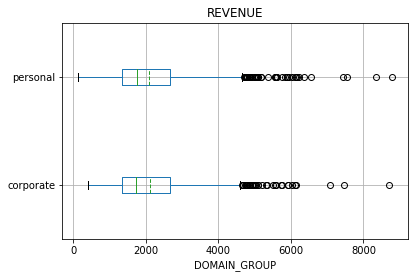

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:08:24   Log-Likelihood:                -11543.
No. Observations:                1459   AIC:                         2.311e+04
Df Residuals:                    1447   BIC:                         2.317e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

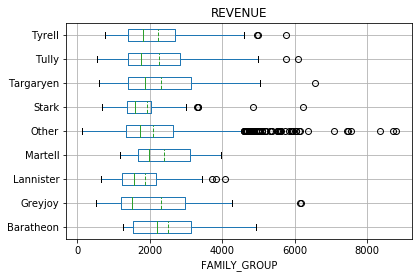

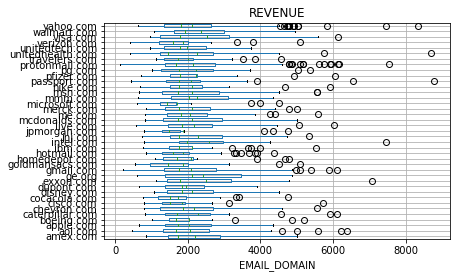

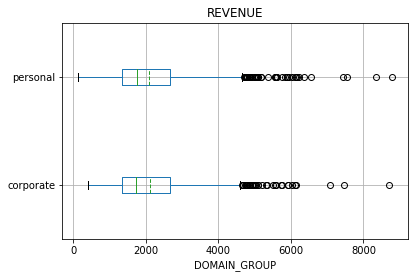

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:08:59   Log-Likelihood:                -11543.
No. Observations:                1459   AIC:                         2.311e+04
Df Residuals:                    1447   BIC:                         2.317e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

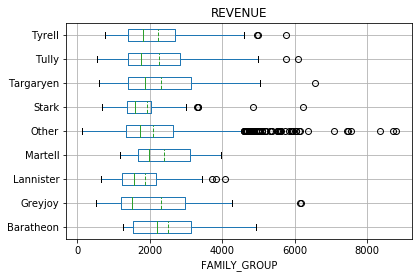

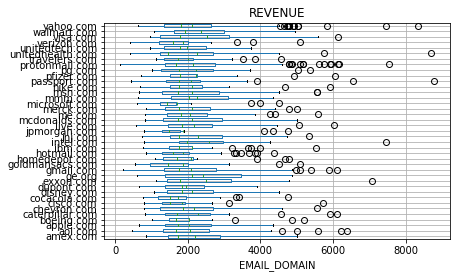

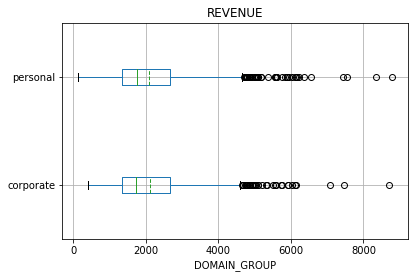

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:09:28   Log-Likelihood:                -11543.
No. Observations:                1459   AIC:                         2.311e+04
Df Residuals:                    1447   BIC:                         2.317e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [1]:
#importing timeit
import timeit

code_to_test = """

# I will build a simple linear regression (OLS) model as a base 
# model to predict the revenue of a customer. Our first goal is to develop a 
# detailed understanding of the features and their relationship with the 
# response variable. After engineering a slew of new features, our goal will 
# be to build a new model that predicts better than the base model.

# import libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split  # train/test split
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading file into python
apchef = pd.read_excel(file)

# checking the first 10 rows of the dataset
# apchef.head(n = 10)

############################
### create family groups ###

# print(apchef.isnull().sum())

# 47 family names are missing, however they are active users and we have their 
# contact information. Retain the accounts with missing family names.   

# impute missing values
apchef['FAMILY_NAME'] = apchef['FAMILY_NAME'].fillna('NA')

# check to see result
# print(apchef.isnull().sum().sum())

# check the top largest families
#lst = apchef['FAMILY_NAME'].value_counts()

# placeholder list
placeholder_lst = []

# looping to family groups
for name in apchef.loc[:, 'FAMILY_NAME']:
    if 'Tully' in name:
        placeholder_lst.append('Tully')
    elif 'Frey' in name:
        placeholder_lst.append('Tully')
    elif 'Arryn' in name:
        placeholder_lst.append('Tully')
    elif 'Targaryen' in name:
        placeholder_lst.append('Targaryen')
    elif 'Lannister' in name:
        placeholder_lst.append('Lannister')
    elif 'Baratheon' in name:
        placeholder_lst.append('Baratheon')
    elif 'Tyrell' in name:
        placeholder_lst.append('Tyrell')
    elif 'Stark' in name:
        placeholder_lst.append('Stark')
    elif 'Snow' in name:
        placeholder_lst.append('Stark') 
    elif 'Greyjoy' in name:
        placeholder_lst.append('Greyjoy') 
    elif 'Martell' in name:
        placeholder_lst.append('Martell')
    elif 'Sand' in name:
        placeholder_lst.append('Martell')
    else: 
        placeholder_lst.append('Other')

# converting list into a series
apchef['FAMILY_GROUP'] = pd.Series(placeholder_lst)

# checking results
# apchef.loc[:,'FAMILY_GROUP'].value_counts()

#############################
# splitting personal emails #

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apchef.iterrows():
    
    # splitting email domain at '@'
    split_email = apchef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
# email_df

#########################################
# concatenating with original DataFrame #

# renaming column to concatenate
email_df.columns = ['name' , 'EMAIL_DOMAIN']

# concatenating personal_email_domain with friends DataFrame
apchef = pd.concat([apchef, email_df.loc[:, 'EMAIL_DOMAIN']],
                    axis = 1)  # 0 for row, 1 for col

# printing value counts of personal_email_domain
apchef.loc[: ,'EMAIL_DOMAIN'].value_counts()

##################################################
# aggregate domains into higher-level categories #

# email domain types
personal_email_domains = ['gmail.com', 'protonmail.com', 'yahoo.com',
                          'msn.com','aol.com', 'passport.com',
                          'hotmail.com', 'live.com', 'me.com']
corporate_email_domains  = ['amex.com', 'cocacola.com', 'merck.com',
                          'mcdonalds.com', 'jnj.com', 'nike.com', 'apple.com', 
                          'dupont.com', 'ge.org', 'ibm.com', 'chevron.com', 
                          'microsoft.com', 'unitedhealth.com','exxon.com', 
                          'travelers.com','boeing.com', 'caterpillar.com', 
                          'pg.com','verizon.com', 'mmm.com', 'disney.com', 
                          'walmart.com', 'pfizer.com', 'visa.com', 
                          'jpmorgan.com', 'goldmansacs.com', 'cisco.com',
                          'unitedtech.com', 'intel.com', 'homedepot.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apchef['EMAIL_DOMAIN']:
        if domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif domain in corporate_email_domains:
            placeholder_lst.append('corporate')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
apchef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
# apchef['DOMAIN_GROUP'].value_counts()

# building a base model

# blueprinting a model type
lm_rev_ttlmeal = smf.ols(
    formula = \"""REVENUE ~ apchef['TOTAL_MEALS_ORDERED']\""", 
    data = apchef)

# telling python to run the data throught the blueprint
results = lm_rev_ttlmeal.fit()

# printing the results
# print(results.summary())

# engineering new features in the hope of outperforming the base model results

#################################
### part 1 - outlier analysis ###
#################################

### Visual EDA (Histograms) ###

# fig, ax = plt.subplots(figsize = (10,8))
# plt.subplot(2,2,1)
# sns.distplot(apchef['REVENUE'],
#            bins = 'fd',
#            color = 'g')
# plt.xlabel('REVENUE')

##############################
 
# plt.subplot(2,2,2)
# sns.distplot(apchef['CROSS_SELL_SUCCESS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
# plt.xlabel('CROSS_SELL_SUCCESS')

##############################
 
# plt.subplot(2,2,3)
# sns.distplot(apchef['TOTAL_MEALS_ORDERED'],
#            bins = 'fd',
#            color = 'orange')
# plt.xlabel('TOTAL_MEALS_ORDERED')

##############################
 
# plt.subplot(2,2,4)
# sns.distplot(apchef['UNIQUE_MEALS_PURCH'],
#            bins = 'fd',
#            color = 'r')
# plt.xlabel('UNIQUE_MEALS_PURCH')
# plt.tight_layout()
# plt.savefig('Ap Chef Data Histograms 1 of 7.png')
# plt.show()

##############################
##############################

# fig, ax = plt.subplots(figsize = (10,8))
# plt.subplot(2,2,1)
# sns.distplot(apchef['CONTACTS_W_CUSTOMER_SERVICE'],
#             bins = 'fd',
#            color = 'g')
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

##############################
 
# plt.subplot(2,2,2)
# sns.distplot(apchef['PRODUCT_CATEGORIES_VIEWED'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
#plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['AVG_TIME_PER_SITE_VISIT'],
#            bins = 'fd',
#            color = 'orange')
#plt.xlabel('AVG_TIME_PER_SITE_VISIT')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['MOBILE_NUMBER'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'r')
#plt.xlabel('MOBILE_NUMBER')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 2 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['CANCELLATIONS_BEFORE_NOON'],
#            bins = 'fd',
#           color = 'g')
#plt.xlabel('CANCELLATIONS_BEFORE_NOON')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['CANCELLATIONS_AFTER_NOON'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
#plt.xlabel('CANCELLATIONS_AFTER_NOON')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['TASTES_AND_PREFERENCES'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'orange')
#plt.xlabel('TASTES_AND_PREFERENCES')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['MOBILE_LOGINS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'r')
#plt.xlabel('MOBILE_LOGINS')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 3 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['PC_LOGINS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'g')
#plt.xlabel('PC_LOGINS')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['WEEKLY_PLAN'],
 #           bins = 'fd',
 #           color = 'y')
#plt.xlabel('WEEKLY_PLAN')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['EARLY_DELIVERIES'],
 #           bins = 'fd',
 #           color = 'orange')
#plt.xlabel('EARLY_DELIVERIES')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['LATE_DELIVERIES'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('LATE_DELIVERIES')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 4 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['PACKAGE_LOCKER'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'g')
#plt.xlabel('PACKAGE_LOCKER')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['REFRIGERATED_LOCKER'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'y')
#plt.xlabel('REFRIGERATED_LOCKER')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['FOLLOWED_RECOMMENDATIONS_PCT'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'orange')
#plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['AVG_PREP_VID_TIME'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('AVG_PREP_VID_TIME')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 5 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['LARGEST_ORDER_SIZE'],
 #           bins = 'fd',
 #           color = 'g')
#plt.xlabel('LARGEST_ORDER_SIZE')

##############################

#plt.subplot(2,2,2)
#sns.distplot(apchef['MASTER_CLASSES_ATTENDED'],
 #           bins = 'fd',
 #           color = 'y')
#plt.xlabel('MASTER_CLASSES_ATTENDED')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['MEDIAN_MEAL_RATING'],
 #           bins = 'fd',
 #           color = 'orange')
#plt.xlabel('MEDIAN_MEAL_RATING')

##############################

#plt.subplot(2,2,4)
#sns.distplot(apchef['AVG_CLICKS_PER_VISIT'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('AVG_CLICKS_PER_VISIT')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 6 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['TOTAL_PHOTOS_VIEWED'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'orange')
#plt.xlabel('TOTAL_PHOTOS_VIEWED')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 7 of 7.png')
#plt.show()

# setting outlier thresholds
REVENUE_hi      = 2400
TOTAL_MEALS_ORDERED_hi  = 130
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi  = 180
WEEKLY_PLAN_hi  = 15
CANCELLATIONS_BEFORE_NOON_hi  = 5
EARLY_DELIVERIES_hi = 5
LATE_DELIVERIES_lo = 10
AVG_PREP_VID_TIME_lo    = 60
AVG_PREP_VID_TIME_hi    = 230
LARGEST_ORDER_SIZE_lo     = 1
LARGEST_ORDER_SIZE_hi     = 9
MASTER_CLASSES_ATTENDED_hi     = 2
MEDIAN_MEAL_RATING_lo = 1
MEDIAN_MEAL_RATING_hi  = 5
AVG_CLICKS_PER_VISIT_lo  = 7.5
AVG_CLICKS_PER_VISIT_hi  = 20

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# Revenue
apchef['out_REVENUE'] = 0
condition_hi = apchef.loc[0:,'out_REVENUE'][apchef['REVENUE'] > REVENUE_hi]

apchef['out_REVENUE'].replace(to_replace = condition_hi,
                            value      = 1,
                            inplace    = True)

# Total meals ordered
apchef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = apchef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apchef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

apchef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# Contacts with customer service
apchef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = apchef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apchef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

apchef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)

# Average time per site visit
apchef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = apchef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][apchef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

apchef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# Weekly plan
apchef['out_WEEKLY_PLAN'] = 0
condition_hi = apchef.loc[0:,'out_WEEKLY_PLAN'][apchef['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

apchef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellations before noon
apchef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = apchef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][apchef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

apchef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)

# Early deliveries
apchef['out_EARLY_DELIVERIES'] = 0
condition_hi = apchef.loc[0:,'out_EARLY_DELIVERIES'][apchef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

apchef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Late deliveries
apchef['out_LATE_DELIVERIES'] = 0
condition_lo = apchef.loc[0:,'out_LATE_DELIVERIES'][apchef['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

apchef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# Average prep video time
apchef['out_AVG_PREP_VID_TIME'] = 0
condition_lo = apchef.loc[0:,'out_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]
condition_hi = apchef.loc[0:,'out_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

apchef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                     value      = 1,
                                     inplace    = True)
apchef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                     value      = 1,
                                     inplace    = True)

# Largest order size
apchef['out_LARGEST_ORDER_SIZE'] = 0
condition_lo = apchef.loc[0:,'out_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]
condition_hi = apchef.loc[0:,'out_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

apchef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Median meal rating
apchef['out_MEDIAN_MEAL_RATING'] = 0
condition_lo = apchef.loc[0:,'out_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]
condition_hi = apchef.loc[0:,'out_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

apchef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Average clicks per visit
apchef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = apchef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
condition_hi = apchef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]

apchef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Master classes attended
apchef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = apchef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][apchef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

apchef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

#####################################
### part 2 - trend based features ###
#####################################

# identify where a variable's trend changes in relationship with the revenue

### Visual EDA (Scatterplots) ###

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['CROSS_SELL_SUCCESS'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('CROSS_SELL_SUCCESS')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['TOTAL_MEALS_ORDERED'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('TOTAL_MEALS_ORDERED')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['UNIQUE_MEALS_PURCH'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('UNIQUE_MEALS_PURCH')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['CONTACTS_W_CUSTOMER_SERVICE'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 1 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['PRODUCT_CATEGORIES_VIEWED'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['AVG_TIME_PER_SITE_VISIT'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('AVG_TIME_PER_SITE_VISIT')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['MOBILE_NUMBER'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('MOBILE_NUMBER')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['CANCELLATIONS_BEFORE_NOON'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('CANCELLATIONS_BEFORE_NOON')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 2 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['CANCELLATIONS_AFTER_NOON'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('CANCELLATIONS_AFTER_NOON')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['TASTES_AND_PREFERENCES'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('TASTES_AND_PREFERENCES')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['MOBILE_LOGINS'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('MOBILE_LOGINS')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['PC_LOGINS'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('PC_LOGINS')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 3 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['WEEKLY_PLAN'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('WEEKLY_PLAN')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['EARLY_DELIVERIES'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('EARLY_DELIVERIES')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['LATE_DELIVERIES'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('LATE_DELIVERIES')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['PACKAGE_LOCKER'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('PACKAGE_LOCKER')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 4 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['REFRIGERATED_LOCKER'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('REFRIGERATED_LOCKER')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['FOLLOWED_RECOMMENDATIONS_PCT'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['AVG_PREP_VID_TIME'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('AVG_PREP_VID_TIME')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['LARGEST_ORDER_SIZE'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('LARGEST_ORDER_SIZE')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 5 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['MASTER_CLASSES_ATTENDED'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('MASTER_CLASSES_ATTENDED')

##############################

#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['MEDIAN_MEAL_RATING'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('MEDIAN_MEAL_RATING')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['AVG_CLICKS_PER_VISIT'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('AVG_CLICKS_PER_VISIT')

##############################

#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['TOTAL_PHOTOS_VIEWED'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('TOTAL_PHOTOS_VIEWED')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 6 of 6.png')
#plt.show()

# setting trend-based thresholds

TOTAL_MEALS_ORDERED_change_hi  = 15 # trend changes above this point
UNIQUE_MEALS_PURCH_change_hi = 10 # data scatters above this point
CONTACTS_W_CUSTOMER_SERVICE_change_hi  = 11 # trend changes above this point
AVG_TIME_PER_SITE_VISIT_change_hi  = 300 # data scatters above this point
CANCELLATIONS_BEFORE_NOON_change_hi  = 8 # data scatters above this point
CANCELLATIONS_AFTER_NOON_change_hi  = 2 # trend changes above this point
MOBILE_LOGINS_change_hi = 6 # trend changes above this point
PC_LOGINS_change_hi = 2 # trend changes above this point
LATE_DELIVERIES_change_hi = 10 # data scatters above this point
AVG_PREP_VID_TIME_change_hi = 300 # data scatters above this point
LARGEST_ORDER_SIZE_change_hi = 8 # trend changes above this point
MASTER_CLASSES_ATTENDED_change_hi  = 2 # trend changes above this point
MEDIAN_MEAL_RATING_change_hi = 4 # trend changes above this point

AVG_CLICKS_PER_VISIT_change_lo  = 10 # data scatters below this point

TOTAL_PHOTOS_VIEWED_change_at   = 0 # zero inflated

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater than sign
 
# Total meals ordered
apchef['change_TOTAL_MEALS_ORDERED'] = 0
condition = apchef.loc[0:,'change_TOTAL_MEALS_ORDERED'][apchef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi]

apchef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)
# Unique meals purchased
apchef['change_UNIQUE_MEALS_PURCH'] = 0
condition = apchef.loc[0:,'change_UNIQUE_MEALS_PURCH'][apchef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_change_hi]

apchef['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# Contacts with customer service
apchef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = apchef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][apchef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

apchef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                                    value      = 1,
                                                    inplace    = True)

# Average time per site visit
apchef['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = apchef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][apchef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_change_hi]

apchef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Cancellations before noon
apchef['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = apchef.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][apchef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_change_hi]

apchef['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Cancellations after noon
apchef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = apchef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][apchef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_change_hi]

apchef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Mobile logins
apchef['change_MOBILE_LOGINS'] = 0
condition = apchef.loc[0:,'change_MOBILE_LOGINS'][apchef['MOBILE_LOGINS'] > MOBILE_LOGINS_change_hi]

apchef['change_MOBILE_LOGINS'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# PC logins
apchef['change_PC_LOGINS'] = 0
condition = apchef.loc[0:,'change_PC_LOGINS'][apchef['PC_LOGINS'] > PC_LOGINS_change_hi]

apchef['change_PC_LOGINS'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Late deliveries
apchef['change_LATE_DELIVERIES'] = 0
condition = apchef.loc[0:,'change_LATE_DELIVERIES'][apchef['LATE_DELIVERIES'] > LATE_DELIVERIES_change_hi]

apchef['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# Average prep video time
apchef['change_AVG_PREP_VID_TIME'] = 0
condition = apchef.loc[0:,'change_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change_hi]

apchef['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# Largest order size
apchef['change_LARGEST_ORDER_SIZE'] = 0
condition = apchef.loc[0:,'change_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change_hi]

apchef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# Median meal rating
apchef['change_MEDIAN_MEAL_RATING'] = 0
condition = apchef.loc[0:,'change_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_change_hi]

apchef['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# less than sign

# Average clicks per visit
apchef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = apchef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_change_lo]

apchef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

########################################
## change at threshold                ##
########################################

# double-equals sign

# Total photos viewed
apchef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = apchef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][apchef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

apchef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# checking results
# apchef.head(n = 10)

#################################
### part 3 - categorical data ###
#################################

# printing columns where the variables for analysis are categorical

# print(f\"""
# FAMILY_GROUP
# {apchef['FAMILY_GROUP'].value_counts()}

# EMAIL_DOMAIN
# {apchef['EMAIL_DOMAIN'].value_counts()}

# DOMAIN_GROUP
# {apchef['DOMAIN_GROUP'].value_counts()}
# \""")

# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    \"""
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	\"""

    apchef.boxplot(column 	     = response,
    	           by 	 		 = cat_var,
        	       vert 	     = False,
            	   patch_artist = False,
                   meanline     = True,
               	   showmeans    = True)

    plt.suptitle("")
    plt.savefig(f'Ap Chef Data Boxplot {cat_var}.png')
    plt.show()

# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'FAMILY_GROUP',
					 data     = apchef)
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'EMAIL_DOMAIN',
					 data     = apchef)
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'DOMAIN_GROUP',
					 data     = apchef)

# one hot encoding categorical variables
one_hot_FAMILY_GROUP       = pd.get_dummies(apchef['FAMILY_GROUP'])
one_hot_EMAIL_DOMAIN       = pd.get_dummies(apchef['EMAIL_DOMAIN'])
one_hot_DOMAIN_GROUP       = pd.get_dummies(apchef['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
apchef = apchef.drop('FAMILY_GROUP', axis = 1)
apchef = apchef.drop('EMAIL_DOMAIN', axis = 1)
apchef = apchef.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
apchef = apchef.join([one_hot_FAMILY_GROUP, one_hot_EMAIL_DOMAIN, one_hot_DOMAIN_GROUP])

# saving new columns
new_columns = apchef.columns

#################################
### part 4 - predictive model ###
#################################

# creating a (Pearson) correlation matrix
df_corr = apchef.corr().round(2)

# printing (Pearson) correlations with Revenue
# print(df_corr.loc['REVENUE'].sort_values(ascending = False))

# making a copy of apchef
apchef_explanatory = apchef.drop(['REVENUE','out_REVENUE','NAME','EMAIL','FIRST_NAME','FAMILY_NAME'],axis = 1)

# formatting each explanatory variable for statsmodels
# for val in apchef_explanatory:
#     print(f"apchef_train['{val}'] +")

# preparing response variable data
apchef_target = apchef.loc[:, 'REVENUE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            apchef_explanatory,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

# merging X_train and y_train so that they can be used in statsmodels
apchef_train = pd.concat([X_train, y_train], axis = 1)

# building a full model
# diminish the model to only include variables that are significant 

# blueprinting a model type
lm_full = smf.ols(formula = \""" REVENUE ~ apchef_train['TOTAL_MEALS_ORDERED'] +
                                apchef_train['UNIQUE_MEALS_PURCH'] +
                                apchef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                apchef_train['AVG_PREP_VID_TIME'] +
                                apchef_train['LARGEST_ORDER_SIZE'] +
                                apchef_train['MASTER_CLASSES_ATTENDED'] +
                                apchef_train['MEDIAN_MEAL_RATING'] +
                                apchef_train['TOTAL_PHOTOS_VIEWED'] +
                                apchef_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                apchef_train['Greyjoy'] +
                                apchef_train['corporate'] +
                                apchef_train['personal'] \""",
                                data = apchef_train)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
print(results_full.summary())

# updating explanatory variables in scikit-learn 
x_variables = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED', 
               'out_CONTACTS_W_CUSTOMER_SERVICE', 'Greyjoy', 'corporate', 
                'personal']

# updating variable DataFrame based the the analysis above
apchef_explanatory  = apchef_explanatory.loc[ : , x_variables]

# preparing response variable data
apchef_target = apchef.loc[:, 'REVENUE']

# updating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            apchef_explanatory,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

###########################################
# INSTANTIATING a Linear Regression model #
lr = sklearn.linear_model.LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)

# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score = lr.score(X_test, y_test).round(4)

###############################
# INSTANTIATING a Ridge model #
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###############################
# INSTANTIATING a Lasso model #
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

# Standardize apchef data for k nearest neighbor

##################################
# INSTANTIATING StandardScaler() #
scaler = StandardScaler()

# FITTING the scaler with data
scaler.fit(apchef_explanatory)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(apchef_explanatory)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# checking the results
# X_scaled_df.describe().round(2)

# adding labels to the scaled DataFrame
X_scaled_df.columns = apchef_explanatory.columns

#  Checking pre- and post-scaling of the data
# print(f\"""
# Dataset BEFORE Scaling
# ----------------------
# {pd.np.var(apchef_explanatory)}


# Dataset AFTER Scaling
# ----------------------
# {pd.np.var(X_scaled_df)}
# \""")

# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

training_accuracy = []
test_accuracy = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f\"""The optimal number of neighbors is {opt_neighbors}\""")

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)

# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)

# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

# comparing results

print(f\"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
KNN        {knn_stand_score_train}           {knn_stand_score_test}
\""")

# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'KNN'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, knn_stand_score_train],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, knn_stand_score_test]}

# KNN yields the highest prediction score, and the model is not overfit 
# (the difference between train score and test score is well within 0.05)
# Therefore, the best prediction model is KNN Regression, 
# with 0.6887 as the test score on unseen data

"""

# calculating execution time
elapsed_time=timeit.timeit(code_to_test, number =3)/3
print(elapsed_time)

In [4]:
# I will build a simple linear regression (OLS) model as a base 
# model to predict the revenue of a customer. Our first goal is to develop a 
# detailed understanding of the features and their relationship with the 
# response variable. After engineering a slew of new features, our goal will 
# be to build a new model that predicts better than the base model.

# import libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split  # train/test split
import sklearn.linear_model # linear models
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading file into python
apchef = pd.read_excel(file)

# checking the first 10 rows of the dataset
# apchef.head(n = 10)

############################
### create family groups ###

# print(apchef.isnull().sum())

# 47 family names are missing, however they are active users and we have their 
# contact information. Retain the accounts with missing family names.   

# impute missing values
apchef['FAMILY_NAME'] = apchef['FAMILY_NAME'].fillna('NA')

# check to see result
# print(apchef.isnull().sum().sum())

# check the top largest families
#lst = apchef['FAMILY_NAME'].value_counts()

# placeholder list
placeholder_lst = []

# looping to family groups
for name in apchef.loc[:, 'FAMILY_NAME']:
    if 'Tully' in name:
        placeholder_lst.append('Tully')
    elif 'Frey' in name:
        placeholder_lst.append('Tully')
    elif 'Arryn' in name:
        placeholder_lst.append('Tully')
    elif 'Targaryen' in name:
        placeholder_lst.append('Targaryen')
    elif 'Lannister' in name:
        placeholder_lst.append('Lannister')
    elif 'Baratheon' in name:
        placeholder_lst.append('Baratheon')
    elif 'Tyrell' in name:
        placeholder_lst.append('Tyrell')
    elif 'Stark' in name:
        placeholder_lst.append('Stark')
    elif 'Snow' in name:
        placeholder_lst.append('Stark') 
    elif 'Greyjoy' in name:
        placeholder_lst.append('Greyjoy') 
    elif 'Martell' in name:
        placeholder_lst.append('Martell')
    elif 'Sand' in name:
        placeholder_lst.append('Martell')
    else: 
        placeholder_lst.append('Other')

# converting list into a series
apchef['FAMILY_GROUP'] = pd.Series(placeholder_lst)

# checking results
# apchef.loc[:,'FAMILY_GROUP'].value_counts()

#########################
# split personal emails #

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apchef.iterrows():
    
    # splitting email domain at '@'
    split_email = apchef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converte placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
# email_df

#######################################
# concatenate with original DataFrame #

# renaming column to concatenate
email_df.columns = ['name' , 'EMAIL_DOMAIN']

# concatenating personal_email_domain with friends DataFrame
apchef = pd.concat([apchef, email_df.loc[:, 'EMAIL_DOMAIN']],
                    axis = 1)  # 0 for row, 1 for col

# printing value counts of personal_email_domain
apchef.loc[: ,'EMAIL_DOMAIN'].value_counts()

##################################################
# aggregate domains into higher-level categories #

# email domain types
personal_email_domains = ['gmail.com', 'protonmail.com', 'yahoo.com',
                          'msn.com','aol.com', 'passport.com',
                          'hotmail.com', 'live.com', 'me.com']
corporate_email_domains  = ['amex.com', 'cocacola.com', 'merck.com',
                          'mcdonalds.com', 'jnj.com', 'nike.com', 'apple.com', 
                          'dupont.com', 'ge.org', 'ibm.com', 'chevron.com', 
                          'microsoft.com', 'unitedhealth.com','exxon.com', 
                          'travelers.com','boeing.com', 'caterpillar.com', 
                          'pg.com','verizon.com', 'mmm.com', 'disney.com', 
                          'walmart.com', 'pfizer.com', 'visa.com', 
                          'jpmorgan.com', 'goldmansacs.com', 'cisco.com',
                          'unitedtech.com', 'intel.com', 'homedepot.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apchef['EMAIL_DOMAIN']:
        if domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif domain in corporate_email_domains:
            placeholder_lst.append('corporate')
            
        else:
            print('Unknown')

# concatenating with original DataFrame
apchef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
# apchef['DOMAIN_GROUP'].value_counts()

In [ ]:
# building a base model

# blueprinting a model type
lm_rev_ttlmeal = smf.ols(
    formula = """REVENUE ~ apchef['TOTAL_MEALS_ORDERED']""", 
    data = apchef)

# telling python to run the data throught the blueprint
results = lm_rev_ttlmeal.fit()

# printing the results
# print(results.summary())

# engineering new features in the hope of outperforming the base model results

#################################
### part 1 - outlier analysis ###
#################################

### Visual EDA (Histograms) ###

# fig, ax = plt.subplots(figsize = (10,8))
# plt.subplot(2,2,1)
# sns.distplot(apchef['REVENUE'],
#            bins = 'fd',
#            color = 'g')
# plt.xlabel('REVENUE')

##############################
 
# plt.subplot(2,2,2)
# sns.distplot(apchef['CROSS_SELL_SUCCESS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
# plt.xlabel('CROSS_SELL_SUCCESS')

##############################
 
# plt.subplot(2,2,3)
# sns.distplot(apchef['TOTAL_MEALS_ORDERED'],
#            bins = 'fd',
#            color = 'orange')
# plt.xlabel('TOTAL_MEALS_ORDERED')

##############################
 
# plt.subplot(2,2,4)
# sns.distplot(apchef['UNIQUE_MEALS_PURCH'],
#            bins = 'fd',
#            color = 'r')
# plt.xlabel('UNIQUE_MEALS_PURCH')
# plt.tight_layout()
# plt.savefig('Ap Chef Data Histograms 1 of 7.png')
# plt.show()

##############################
##############################

# fig, ax = plt.subplots(figsize = (10,8))
# plt.subplot(2,2,1)
# sns.distplot(apchef['CONTACTS_W_CUSTOMER_SERVICE'],
#             bins = 'fd',
#            color = 'g')
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

##############################
 
# plt.subplot(2,2,2)
# sns.distplot(apchef['PRODUCT_CATEGORIES_VIEWED'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
#plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['AVG_TIME_PER_SITE_VISIT'],
#            bins = 'fd',
#            color = 'orange')
#plt.xlabel('AVG_TIME_PER_SITE_VISIT')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['MOBILE_NUMBER'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'r')
#plt.xlabel('MOBILE_NUMBER')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 2 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['CANCELLATIONS_BEFORE_NOON'],
#            bins = 'fd',
#           color = 'g')
#plt.xlabel('CANCELLATIONS_BEFORE_NOON')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['CANCELLATIONS_AFTER_NOON'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'y')
#plt.xlabel('CANCELLATIONS_AFTER_NOON')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['TASTES_AND_PREFERENCES'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'orange')
#plt.xlabel('TASTES_AND_PREFERENCES')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['MOBILE_LOGINS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'r')
#plt.xlabel('MOBILE_LOGINS')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 3 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['PC_LOGINS'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'g')
#plt.xlabel('PC_LOGINS')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['WEEKLY_PLAN'],
 #           bins = 'fd',
 #           color = 'y')
#plt.xlabel('WEEKLY_PLAN')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['EARLY_DELIVERIES'],
 #           bins = 'fd',
 #           color = 'orange')
#plt.xlabel('EARLY_DELIVERIES')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['LATE_DELIVERIES'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('LATE_DELIVERIES')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 4 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['PACKAGE_LOCKER'],
#            bins = 'fd',
#            kde = False,
#            rug = True,
#            color = 'g')
#plt.xlabel('PACKAGE_LOCKER')

##############################
 
#plt.subplot(2,2,2)
#sns.distplot(apchef['REFRIGERATED_LOCKER'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'y')
#plt.xlabel('REFRIGERATED_LOCKER')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['FOLLOWED_RECOMMENDATIONS_PCT'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'orange')
#plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

##############################
 
#plt.subplot(2,2,4)
#sns.distplot(apchef['AVG_PREP_VID_TIME'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('AVG_PREP_VID_TIME')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 5 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['LARGEST_ORDER_SIZE'],
 #           bins = 'fd',
 #           color = 'g')
#plt.xlabel('LARGEST_ORDER_SIZE')

##############################

#plt.subplot(2,2,2)
#sns.distplot(apchef['MASTER_CLASSES_ATTENDED'],
 #           bins = 'fd',
 #           color = 'y')
#plt.xlabel('MASTER_CLASSES_ATTENDED')

##############################
 
#plt.subplot(2,2,3)
#sns.distplot(apchef['MEDIAN_MEAL_RATING'],
 #           bins = 'fd',
 #           color = 'orange')
#plt.xlabel('MEDIAN_MEAL_RATING')

##############################

#plt.subplot(2,2,4)
#sns.distplot(apchef['AVG_CLICKS_PER_VISIT'],
 #           bins = 'fd',
 #           color = 'r')
#plt.xlabel('AVG_CLICKS_PER_VISIT')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 6 of 7.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.distplot(apchef['TOTAL_PHOTOS_VIEWED'],
 #           bins = 'fd',
 #           kde = False,
 #           rug = True,
 #           color = 'orange')
#plt.xlabel('TOTAL_PHOTOS_VIEWED')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Histograms 7 of 7.png')
#plt.show()

In [36]:

# setting outlier thresholds
REVENUE_hi      = 2400
TOTAL_MEALS_ORDERED_lo = 15
TOTAL_MEALS_ORDERED_hi  = 120
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi  = 180
WEEKLY_PLAN_lo  = 0
CANCELLATIONS_BEFORE_NOON_hi  = 5
EARLY_DELIVERIES_hi = 5
LATE_DELIVERIES_lo = 10
AVG_PREP_VID_TIME_lo    = 60
AVG_PREP_VID_TIME_hi    = 230
LARGEST_ORDER_SIZE_lo     = 1
LARGEST_ORDER_SIZE_hi     = 9
MASTER_CLASSES_ATTENDED_hi     = 2
MEDIAN_MEAL_RATING_lo = 1
MEDIAN_MEAL_RATING_hi  = 5
AVG_CLICKS_PER_VISIT_lo  = 7.5
AVG_CLICKS_PER_VISIT_hi  = 20

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# Revenue
apchef['out_REVENUE'] = 0
condition_hi = apchef.loc[0:,'out_REVENUE'][apchef['REVENUE'] > REVENUE_hi]

apchef['out_REVENUE'].replace(to_replace = condition_hi,
                            value      = 1,
                            inplace    = True)

# Total meals ordered
apchef['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = apchef.loc[0:,'out_TOTAL_MEALS_ORDERED'][apchef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

apchef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# Contacts with customer service
apchef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = apchef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][apchef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

apchef['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)

# Average time per site visit
apchef['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = apchef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][apchef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

apchef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# Weekly plan
apchef['out_WEEKLY_PLAN'] = 0
condition_hi = apchef.loc[0:,'out_WEEKLY_PLAN'][apchef['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

apchef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellations before noon
apchef['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = apchef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][apchef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

apchef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)

# Early deliveries
apchef['out_EARLY_DELIVERIES'] = 0
condition_hi = apchef.loc[0:,'out_EARLY_DELIVERIES'][apchef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

apchef['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Late deliveries
apchef['out_LATE_DELIVERIES'] = 0
condition_lo = apchef.loc[0:,'out_LATE_DELIVERIES'][apchef['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

apchef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# Average prep video time
apchef['out_AVG_PREP_VID_TIME'] = 0
condition_lo = apchef.loc[0:,'out_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]
condition_hi = apchef.loc[0:,'out_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

apchef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                     value      = 1,
                                     inplace    = True)
apchef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                     value      = 1,
                                     inplace    = True)

# Largest order size
apchef['out_LARGEST_ORDER_SIZE'] = 0
condition_lo = apchef.loc[0:,'out_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]
condition_hi = apchef.loc[0:,'out_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

apchef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Median meal rating
apchef['out_MEDIAN_MEAL_RATING'] = 0
condition_lo = apchef.loc[0:,'out_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]
condition_hi = apchef.loc[0:,'out_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

apchef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Average clicks per visit
apchef['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = apchef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
condition_hi = apchef.loc[0:,'out_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]

apchef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)
apchef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Master classes attended
apchef['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = apchef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][apchef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

apchef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

#####################################
### part 2 - trend based features ###
#####################################

# identify where a variable's trend changes in relationship with the revenue

### Visual EDA (Scatterplots) ###

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['CROSS_SELL_SUCCESS'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('CROSS_SELL_SUCCESS')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['TOTAL_MEALS_ORDERED'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('TOTAL_MEALS_ORDERED')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['UNIQUE_MEALS_PURCH'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('UNIQUE_MEALS_PURCH')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['CONTACTS_W_CUSTOMER_SERVICE'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 1 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['PRODUCT_CATEGORIES_VIEWED'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['AVG_TIME_PER_SITE_VISIT'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('AVG_TIME_PER_SITE_VISIT')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['MOBILE_NUMBER'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('MOBILE_NUMBER')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['CANCELLATIONS_BEFORE_NOON'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('CANCELLATIONS_BEFORE_NOON')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 2 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['CANCELLATIONS_AFTER_NOON'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('CANCELLATIONS_AFTER_NOON')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['TASTES_AND_PREFERENCES'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('TASTES_AND_PREFERENCES')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['MOBILE_LOGINS'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('MOBILE_LOGINS')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['PC_LOGINS'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('PC_LOGINS')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 3 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['WEEKLY_PLAN'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('WEEKLY_PLAN')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['EARLY_DELIVERIES'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('EARLY_DELIVERIES')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['LATE_DELIVERIES'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('LATE_DELIVERIES')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['PACKAGE_LOCKER'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('PACKAGE_LOCKER')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 4 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['REFRIGERATED_LOCKER'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('REFRIGERATED_LOCKER')

##############################
 
#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['FOLLOWED_RECOMMENDATIONS_PCT'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['AVG_PREP_VID_TIME'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('AVG_PREP_VID_TIME')

##############################
 
#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['LARGEST_ORDER_SIZE'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('LARGEST_ORDER_SIZE')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 5 of 6.png')
#plt.show()

##############################
##############################

#fig, ax = plt.subplots(figsize = (10,8))
#plt.subplot(2,2,1)
#sns.scatterplot(x = apchef['MASTER_CLASSES_ATTENDED'],
 #               y = apchef['REVENUE'],
 #               color = 'g')
#plt.xlabel('MASTER_CLASSES_ATTENDED')

##############################

#plt.subplot(2,2,2)
#sns.scatterplot(x = apchef['MEDIAN_MEAL_RATING'],
 #               y = apchef['REVENUE'],
 #               color = 'y')
#plt.xlabel('MEDIAN_MEAL_RATING')

##############################
 
#plt.subplot(2,2,3)
#sns.scatterplot(x = apchef['AVG_CLICKS_PER_VISIT'],
 #               y = apchef['REVENUE'],
 #               color = 'orange')
#plt.xlabel('AVG_CLICKS_PER_VISIT')

##############################

#plt.subplot(2,2,4)
#sns.scatterplot(x = apchef['TOTAL_PHOTOS_VIEWED'],
 #               y = apchef['REVENUE'],
 #               color = 'r')
#plt.xlabel('TOTAL_PHOTOS_VIEWED')
#plt.tight_layout()
#plt.savefig('Ap Chef Data Scatterplot 6 of 6.png')
#plt.show()

# setting trend-based thresholds

TOTAL_MEALS_ORDERED_change_hi  = 15 # trend changes above this point
UNIQUE_MEALS_PURCH_change_hi = 10 # data scatters above this point
CONTACTS_W_CUSTOMER_SERVICE_change_hi  = 11 # trend changes above this point
AVG_TIME_PER_SITE_VISIT_change_hi  = 300 # data scatters above this point
CANCELLATIONS_BEFORE_NOON_change_hi  = 8 # data scatters above this point
CANCELLATIONS_AFTER_NOON_change_hi  = 2 # trend changes above this point
MOBILE_LOGINS_change_hi = 6 # trend changes above this point
PC_LOGINS_change_hi = 2 # trend changes above this point
LATE_DELIVERIES_change_hi = 10 # data scatters above this point
AVG_PREP_VID_TIME_change_hi = 300 # data scatters above this point
LARGEST_ORDER_SIZE_change_hi = 8 # trend changes above this point
MASTER_CLASSES_ATTENDED_change_hi  = 2 # trend changes above this point
MEDIAN_MEAL_RATING_change_hi = 4 # trend changes above this point

AVG_CLICKS_PER_VISIT_change_lo  = 10 # data scatters below this point

TOTAL_PHOTOS_VIEWED_change_at   = 0 # zero inflated

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater than sign
 
# Total meals ordered
apchef['change_TOTAL_MEALS_ORDERED'] = 0
condition = apchef.loc[0:,'change_TOTAL_MEALS_ORDERED'][apchef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi]

apchef['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)
# Unique meals purchased
apchef['change_UNIQUE_MEALS_PURCH'] = 0
condition = apchef.loc[0:,'change_UNIQUE_MEALS_PURCH'][apchef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_change_hi]

apchef['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# Contacts with customer service
apchef['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = apchef.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][apchef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

apchef['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                                    value      = 1,
                                                    inplace    = True)

# Average time per site visit
apchef['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = apchef.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][apchef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_change_hi]

apchef['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Cancellations before noon
apchef['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = apchef.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][apchef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_change_hi]

apchef['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Cancellations after noon
apchef['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = apchef.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][apchef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_change_hi]

apchef['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Mobile logins
apchef['change_MOBILE_LOGINS'] = 0
condition = apchef.loc[0:,'change_MOBILE_LOGINS'][apchef['MOBILE_LOGINS'] > MOBILE_LOGINS_change_hi]

apchef['change_MOBILE_LOGINS'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# PC logins
apchef['change_PC_LOGINS'] = 0
condition = apchef.loc[0:,'change_PC_LOGINS'][apchef['PC_LOGINS'] > PC_LOGINS_change_hi]

apchef['change_PC_LOGINS'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

# Late deliveries
apchef['change_LATE_DELIVERIES'] = 0
condition = apchef.loc[0:,'change_LATE_DELIVERIES'][apchef['LATE_DELIVERIES'] > LATE_DELIVERIES_change_hi]

apchef['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# Average prep video time
apchef['change_AVG_PREP_VID_TIME'] = 0
condition = apchef.loc[0:,'change_AVG_PREP_VID_TIME'][apchef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change_hi]

apchef['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# Largest order size
apchef['change_LARGEST_ORDER_SIZE'] = 0
condition = apchef.loc[0:,'change_LARGEST_ORDER_SIZE'][apchef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change_hi]

apchef['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# Median meal rating
apchef['change_MEDIAN_MEAL_RATING'] = 0
condition = apchef.loc[0:,'change_MEDIAN_MEAL_RATING'][apchef['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_change_hi]

apchef['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# less than sign

# Average clicks per visit
apchef['change_AVG_CLICKS_PER_VISIT'] = 0
condition = apchef.loc[0:,'change_AVG_CLICKS_PER_VISIT'][apchef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_change_lo]

apchef['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

########################################
## change at threshold                ##
########################################

# double-equals sign

# Total photos viewed
apchef['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = apchef.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][apchef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

apchef['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# checking results
# apchef.head(n = 10)

#################################
### part 3 - categorical data ###
#################################

# printing columns where the variables for analysis are categorical

# print(f"""
# FAMILY_GROUP
# {apchef['FAMILY_GROUP'].value_counts()}

# EMAIL_DOMAIN
# {apchef['EMAIL_DOMAIN'].value_counts()}

# DOMAIN_GROUP
# {apchef['DOMAIN_GROUP'].value_counts()}
# """)

# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    apchef.boxplot(column 	     = response,
    	           by 	 		 = cat_var,
        	       vert 	     = False,
            	   patch_artist = False,
                   meanline     = True,
               	   showmeans    = True)

    plt.suptitle("")
    plt.savefig(f'Ap Chef Data Boxplot {cat_var}.png')
    plt.show()

# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'FAMILY_GROUP',
					 data     = apchef)
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'EMAIL_DOMAIN',
					 data     = apchef)
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'DOMAIN_GROUP',
					 data     = apchef)

# one hot encoding categorical variables
one_hot_FAMILY_GROUP       = pd.get_dummies(apchef['FAMILY_GROUP'])
one_hot_EMAIL_DOMAIN       = pd.get_dummies(apchef['EMAIL_DOMAIN'])
one_hot_DOMAIN_GROUP       = pd.get_dummies(apchef['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
apchef = apchef.drop('FAMILY_GROUP', axis = 1)
apchef = apchef.drop('EMAIL_DOMAIN', axis = 1)
apchef = apchef.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
apchef = apchef.join([one_hot_FAMILY_GROUP, one_hot_EMAIL_DOMAIN, one_hot_DOMAIN_GROUP])

# saving new columns
new_columns = apchef.columns

#################################
### part 4 - predictive model ###
#################################

# creating a (Pearson) correlation matrix
df_corr = apchef.corr().round(2)

# printing (Pearson) correlations with Revenue
# print(df_corr.loc['REVENUE'].sort_values(ascending = False))

# making a copy of apchef
apchef_explanatory = apchef.drop(['REVENUE','out_REVENUE','NAME','EMAIL','FIRST_NAME','FAMILY_NAME'],axis = 1)

# preparing response variable data
apchef_target = apchef.loc[:, 'REVENUE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            apchef_explanatory,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

# merging X_train and y_train so that they can be used in statsmodels
apchef_train = pd.concat([X_train, y_train], axis = 1)

# formatting each explanatory variable for statsmodels
# for val in apchef_explanatory:
#     print(f"apchef_train['{val}'] +")

# building a full model
# diminish the model to only include variables that are significant 

# blueprinting a model type
lm_full = smf.ols(formula = """ REVENUE ~ apchef_train['TOTAL_MEALS_ORDERED'] +
                                apchef_train['UNIQUE_MEALS_PURCH'] +
                                apchef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                apchef_train['AVG_PREP_VID_TIME'] +
                                apchef_train['LARGEST_ORDER_SIZE'] +
                                apchef_train['MASTER_CLASSES_ATTENDED'] +
                                apchef_train['MEDIAN_MEAL_RATING'] +
                                apchef_train['TOTAL_PHOTOS_VIEWED'] +
                                apchef_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                apchef_train['Greyjoy'] +
                                apchef_train['corporate'] +
                                apchef_train['personal'] """,
                                data = apchef_train)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
print(results_full.summary())

# updating explanatory variables in scikit-learn 
x_variables = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_PREP_VID_TIME', 
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED', 
               'out_CONTACTS_W_CUSTOMER_SERVICE', 'Greyjoy', 'corporate', 
                'personal']

# updating variable DataFrame based the the analysis above
apchef_explanatory  = apchef_explanatory.loc[ : , x_variables]

# preparing response variable data
apchef_target = apchef.loc[:, 'REVENUE']

# updating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            apchef_explanatory,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

###########################################
# INSTANTIATING a Linear Regression model #
lr = sklearn.linear_model.LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)

# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score = lr.score(X_test, y_test).round(4)

###############################
# INSTANTIATING a Ridge model #
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###############################
# INSTANTIATING a Lasso model #
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

# Standardize apchef data for k nearest neighbor

##################################
# INSTANTIATING StandardScaler() #
scaler = StandardScaler()

# FITTING the scaler with data
scaler.fit(apchef_explanatory)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(apchef_explanatory)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# checking the results
# X_scaled_df.describe().round(2)

# adding labels to the scaled DataFrame
X_scaled_df.columns = apchef_explanatory.columns

#  Checking pre- and post-scaling of the data
# print(f\"""
# Dataset BEFORE Scaling
# ----------------------
# {pd.np.var(apchef_explanatory)}


# Dataset AFTER Scaling
# ----------------------
# {pd.np.var(X_scaled_df)}
# \""")

# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            apchef_target,
            test_size = 0.25,
            random_state = 219)

training_accuracy = []
test_accuracy = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)

# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)

# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
KNN        {knn_stand_score_train}           {knn_stand_score_test}
""")

# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'KNN'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, knn_stand_score_train],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, knn_stand_score_test]}

# KNN yields the highest prediction score, and the model is not overfit 
# (the difference between train score and test score is well within 0.05)
# Therefore, the best prediction model is KNN Regression, 
# with 0.6887 as the test score on unseen data

KeyError: 'FAMILY_GROUP'

In [40]:
# blueprinting a model type
lm_full = smf.ols(formula = """ REVENUE ~ apchef_train['TOTAL_MEALS_ORDERED'] +
apchef_train['UNIQUE_MEALS_PURCH'] +
apchef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
apchef_train['AVG_PREP_VID_TIME'] +
apchef_train['LARGEST_ORDER_SIZE'] +
apchef_train['MASTER_CLASSES_ATTENDED'] +
apchef_train['MEDIAN_MEAL_RATING'] +
apchef_train['TOTAL_PHOTOS_VIEWED'] +
apchef_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
apchef_train['out_AVG_PREP_VID_TIME'] +
apchef_train['change_MEDIAN_MEAL_RATING'] +
apchef_train['change_AVG_CLICKS_PER_VISIT'] +
apchef_train['Greyjoy'] +
apchef_train['homedepot.com'] +
apchef_train['unitedhealth.com'] +
apchef_train['yahoo.com'] +
apchef_train['corporate'] +
apchef_train['personal'] """,
                                data = apchef_train)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     179.1
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:51:42   Log-Likelihood:                -11519.
No. Observations:                1459   AIC:                         2.307e+04
Df Residuals:                    1441   BIC:                         2.317e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        -386.6312     72.607     -5.325      0.000    -529.058    -244.205
apchef_train['TOTAL_MEALS_ORDERED']                 4.5968      0.409     11.233      0.000       3.794       5.400
apchef_train['UNIQUE_MEALS_PURCH']                -69.4543      6.926    -10.027      0.000     -83.041     -55.867
apchef_train['CONTACTS_W_CUSTOMER_SERVICE']       126.1658     12.213     10.330      0.000     102.208     150.123
apchef_train['AVG_PREP_VID_TIME']                   8.2718      0.773     10.697      0.000       6.755       9.789
apchef_train['LARGEST_ORDER_SIZE']                -77.7565     19.009     -4.090      0.000    -115.046     -40.467
apchef_train['MASTER_CLASSES_ATTENDED']           163.0156     30.994      5.260      0.000     102.218     223.813
apchef_train['MEDIAN_MEAL_RATING']                285.9252     31.483      9.082      0.000     224.168     347.683
apchef_train['TOTAL_PHOTOS_VIEWED']                 0.6142      0.108      5.688      0.000       0.402       0.826
apchef_train['out_CONTACTS_W_CUSTOMER_SERVICE']  -893.9718     99.818     -8.956      0.000   -1089.776    -698.168
apchef_train['out_AVG_PREP_VID_TIME']             200.0570     85.038      2.353      0.019      33.246     366.868
apchef_train['change_MEDIAN_MEAL_RATING']       -1135.2770    223.245     -5.085      0.000   -1573.197    -697.357
apchef_train['change_AVG_CLICKS_PER_VISIT']       342.0507     97.818      3.497      0.000     150.170     533.931
apchef_train['Greyjoy']                           535.1222    183.105      2.922      0.004     175.941     894.303
apchef_train['homedepot.com']                    -369.0575    184.347     -2.002      0.045    -730.675      -7.440
apchef_train['unitedhealth.com']                  333.4612    157.548      2.117      0.034      24.413     642.509
apchef_train['yahoo.com']                         110.0592     51.677      2.130      0.033       8.689     211.430
apchef_train['corporate']                        -186.0584     41.532     -4.480      0.000    -267.529    -104.588
apchef_train['personal']                         -200.5728     40.590     -4.941      0.000    -280.194    -120.952
==============================================================================
Omnibus:                      681.300   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8935.000
Skew:                           1.827   Prob(JB):                         0.00
Kurtosis:                      14.560   Cond. No.                     2.63e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance

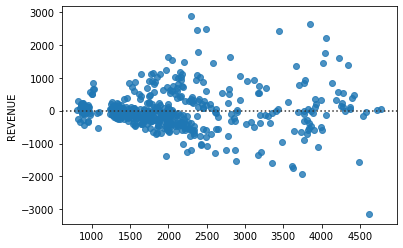

In [4]:
sns.residplot(x = knn_stand_pred,  # prediction values
              y = y_test) # actual values

# displaying the plot
plt.show()

# problem with this model: the variance in prediction is too high ~ $150,000, 
# inpractical